In [3]:
import pandas as pd
import numpy as np
import random

In [9]:
path = r"C:\Users\hazem\OneDrive\Documents\archive\assignments\weatherHistory.csv"

df = pd.read_csv(path)

df = df.dropna(subset=["Summary"])

df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [11]:
def map_weather(summary):
    summary = summary.lower()
    if "clear" in summary or "sunny" in summary:
        return "Sunny"
    elif "cloudy" in summary or "overcast" in summary:
        return "Cloudy"
    elif "rain" in summary or "drizzle" in summary or "storm" in summary:
        return "Rainy"
    else:
        return "Cloudy"

df["State"] = df["Summary"].apply(map_weather)


In [13]:
weather_sequence = df["State"].tolist()

states = ["Sunny", "Cloudy", "Rainy"]


In [15]:
initial_counts = {s: 0 for s in states}

for state in weather_sequence:
    initial_counts[state] += 1

total = sum(initial_counts.values())
pi_0 = np.array([initial_counts[s] / total for s in states])

print("\nInitial State Distribution π0:")
for s, p in zip(states, pi_0):
    print(f"{s}: {round(p,4)}")




Initial State Distribution π0:
Sunny: 0.1129
Cloudy: 0.8859
Rainy: 0.0012


In [17]:
transition_counts = {s: {s2: 0 for s2 in states} for s in states}

for i in range(len(weather_sequence) - 1):
    curr_state = weather_sequence[i]
    next_state = weather_sequence[i+1]
    transition_counts[curr_state][next_state] += 1

transition_matrix = pd.DataFrame(transition_counts).T
print("\nTransition Count Matrix:")
print(transition_matrix)



Transition Count Matrix:
        Sunny  Cloudy  Rainy
Sunny    7576    3314      0
Cloudy   3314   82118     18
Rainy       0      18     94


In [19]:
transition_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)
print("\nTransition Probability Matrix:")
print(transition_prob)



Transition Probability Matrix:
           Sunny    Cloudy     Rainy
Sunny   0.695684  0.304316  0.000000
Cloudy  0.038783  0.961006  0.000211
Rainy   0.000000  0.160714  0.839286


In [33]:
A_np = transition_prob.values
pi = np.array([1/3, 1/3, 1/3])  # initial uniform distribution

for _ in range(10000):
    pi = pi @ A_np

pi = pi / pi.sum()  # normalize

steady_state = pi  # rename for clarity

print("\nSteady-State Distribution:")
for s, p in zip(states, steady_state):
    print(f"{s}: {round(p,4)}")


Steady-State Distribution:
Sunny: 0.1129
Cloudy: 0.8859
Rainy: 0.0012


In [35]:
def predict_next_day(current_state, transition_prob):
    next_states = list(transition_prob.columns)
    probabilities = transition_prob.loc[current_state].values
    return random.choices(next_states, probabilities)[0]

current_state = "Sunny"
next_day = predict_next_day(current_state, transition_prob)
print(f"\nTomorrow prediction if today is {current_state}: {next_day}")




Tomorrow prediction if today is Sunny: Sunny


In [37]:
def generate_weather_sequence(start_state, days, transition_prob):
    sequence = [start_state]
    current_state = start_state
    for _ in range(days - 1):
        next_state = predict_next_day(current_state, transition_prob)
        sequence.append(next_state)
        current_state = next_state
    return sequence

weather_7days = generate_weather_sequence("Sunny", 7, transition_prob)
print("\nPredicted Weather for 7 Days:")
print(weather_7days)




Predicted Weather for 7 Days:
['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy']


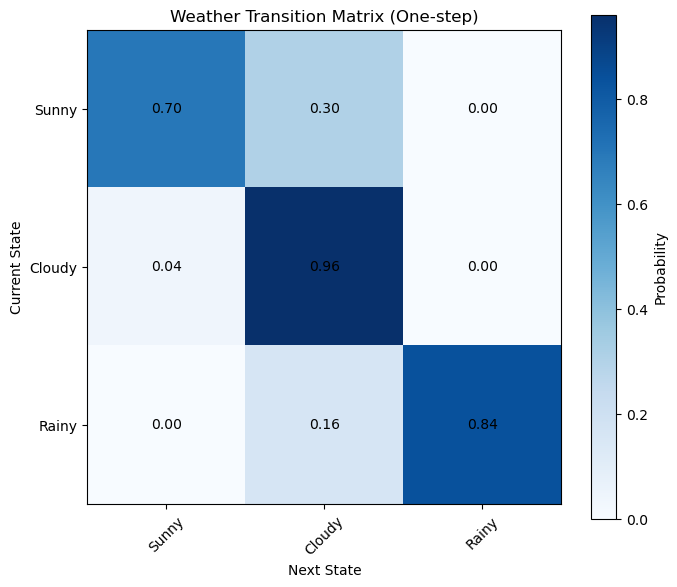

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
plt.imshow(A_np, cmap="Blues")

plt.colorbar(label="Probability")

plt.xticks(range(len(states)), states, rotation=45)
plt.yticks(range(len(states)), states)

plt.title("Weather Transition Matrix (One-step)")
plt.xlabel("Next State")
plt.ylabel("Current State")

# Add numbers inside each cell
for i in range(len(states)):
    for j in range(len(states)):
        plt.text(j, i, f"{A_np[i, j]:.2f}", 
                 ha="center", va="center", color="black")

plt.tight_layout()
plt.show()
